In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# READ THE DATASET

In [2]:
train_data = pd.read_csv('aug_train.csv') 

In [3]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
train_data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


# PRE-PROCESSING

In [6]:
train_data.shape

(19158, 14)

It looks like some values in the dataset are NaN, we would like to further inspect to which extent it affects our data.



In [39]:
train_data.describe()

,enrollee_id,city,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,80.128876,0.828848,65.366896,0.249348
std,9616.292592,46.413570,0.123362,60.058462,0.432647
min,1.000000,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,21.000000,0.740000,23.000000,0.000000
50%,16982.500000,101.000000,0.903000,47.000000,0.000000
75%,25169.750000,104.000000,0.920000,88.000000,0.000000
max,33380.000000,180.000000,0.949000,336.000000,1.000000


In [40]:
train_data.info

<bound method DataFrame.info of        enrollee_id  city  city_development_index gender  \
0             8949   103                   0.920   Male   
1            29725    40                   0.776   Male   
2            11561    21                   0.624   Male   
3            33241   115                   0.789   Male   
4              666   162                   0.767   Male   
...            ...   ...                     ...    ...   
19153         7386   173                   0.878   Male   
19154        31398   103                   0.920   Male   
19155        24576   103                   0.920   Male   
19156         5756    65                   0.802   Male   
19157        23834    67                   0.855   Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time cours

In [41]:
train_data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [42]:
train_data['gender'].value_counts()

Male      17729
Female     1238
Other       191
Name: gender, dtype: int64

In [43]:
train_data['enrollee_id'].value_counts()

8949     1
10660    1
30726    1
18507    1
31273    1
        ..
11547    1
32067    1
14356    1
18051    1
23834    1
Name: enrollee_id, Length: 19158, dtype: int64

In [8]:
train_data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [50]:
train_data['gender'] = train_data['gender'].replace(np.nan, 'Male')
train_data['enrolled_university'] = train_data['enrolled_university'].replace(np.nan, 'no_enrollment')
train_data['education_level'] = train_data['education_level'].replace(np.nan,'Graduate')
train_data['major_discipline'] =train_data['major_discipline'].replace(np.nan,'STEM')
train_data['experience'] = train_data['experience'].replace(np.nan,'>20')
train_data['company_size'] = train_data['company_size'].replace(np.nan,'50-99')
train_data['company_type'] = train_data['company_type'].replace(np.nan,'Pvt Ltd')
train_data['last_new_job'] =train_data['last_new_job'].replace(np.nan,'1')

In [51]:
train_data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Now all the missing values have been handled



Text(0.5, 1.0, 'Boxplot of city_development_index')

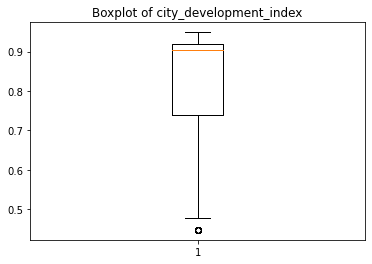

In [52]:
plt.boxplot(data['city_development_index'])
plt.title('Boxplot of city_development_index')

Text(0.5, 1.0, 'Boxplot of city_development_index')

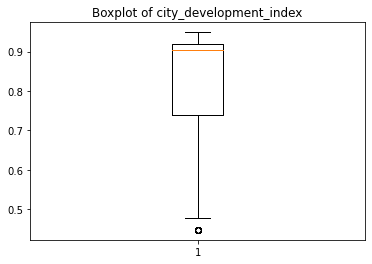

In [53]:
plt.boxplot(data['city_development_index'])
plt.title('Boxplot of city_development_index')

In [54]:
#Plot the distribution plot for features to find out the outliers


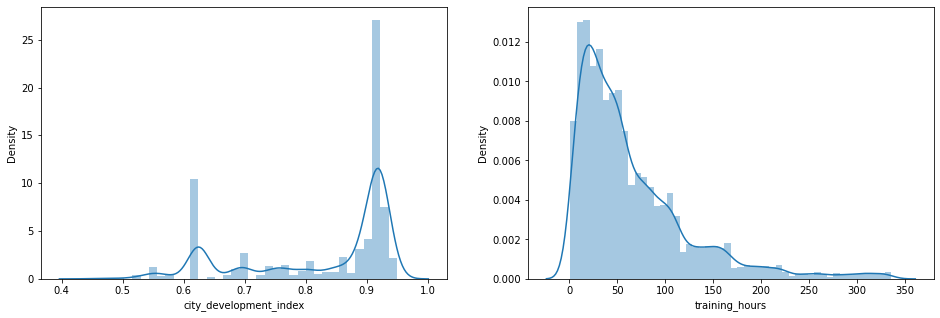

In [55]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['city_development_index'])
plt.subplot(1,2,2)
sns.distplot(data['training_hours'])
plt.show()

In [56]:
#Label encoding for coverting labels in Classification to numeric forms
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [57]:
train_data.city=le.fit_transform(train_data['city'])
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,73,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,27,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,14,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,81,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,113,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [58]:
# Making Dictionaries of ordinal features

gender_map = {
        'Female': 2,
        'Male': 1,
        'Other': 0
         }

relevent_experience_map = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_map = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_map = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_map ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_map = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_map = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}
company_size_map = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_map = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

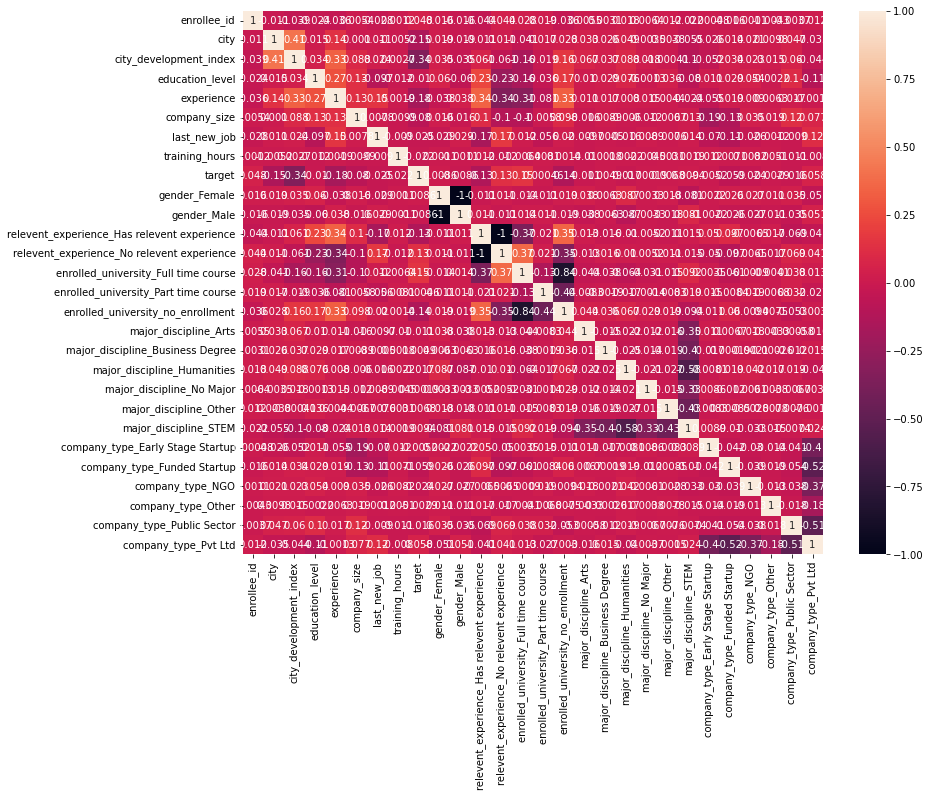

In [59]:
#Correlation between the datas
plt.figure(figsize=(13, 10))
sns.heatmap(data.corr(), annot = True);
plt.show()

In [60]:
#Feature reduction
data=data.drop(['enrollee_id'],axis=1)
data

,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,103,0.920,3.0,22.0,3.0,1.0,36,1.0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,40,0.776,3.0,16.0,3.0,5.0,47,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,21,0.624,3.0,6.0,3.0,6.0,83,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,115,0.789,3.0,1.0,3.0,6.0,52,1.0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,162,0.767,4.0,22.0,3.0,4.0,8,0.0,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,3.0,15.0,3.0,1.0,42,1.0,0,1,...,1,0,0,0,0,0,0,0,0,1
19154,103,0.920,3.0,15.0,3.0,4.0,52,1.0,0,1,...,0,0,0,1,0,0,0,0,0,1
19155,103,0.920,3.0,22.0,3.0,4.0,44,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1
19156,65,0.802,2.0,1.0,5.0,2.0,97,0.0,0,1,...,0,0,0,1,0,0,0,0,0,1


0.0    14240
1.0     4727
Name: target, dtype: int64


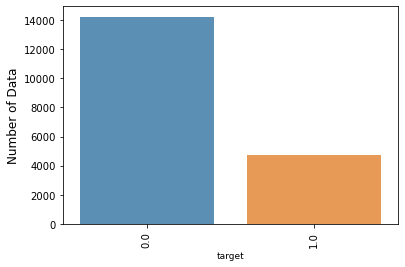

In [61]:
#Target Feature Analysis
# 0 – Not looking for job change,
# 1 – Looking for a job change
mnj = data['target'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(mnj.index, mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(mnj)
plt.show();

In [62]:
# Class Balanced
# 0 – Not looking for job change,
# 1 – Looking for a job change
#mnj = y['target'].value_counts()  
#plt.figure(figsize=(6,4))
#sns.barplot(mnj.index, mnj.values, alpha=0.8)
#plt.ylabel('Number of Data', fontsize=12)
#plt.xlabel('target', fontsize=9)
##plt.xticks(rotation=90)
#print(mnj)
#plt.show();

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score,plot_roc_curve,log_loss
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

In [64]:
# Independent & Dependent Variables Split
y= pd.DataFrame(data['target'])
X= data.drop(['target'],axis=1)

In [65]:
#Standardization
scaler_x = MinMaxScaler()
X = scaler_x.fit_transform(X)

In [80]:
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y)

# Exploratory Data Analysis (EDA)

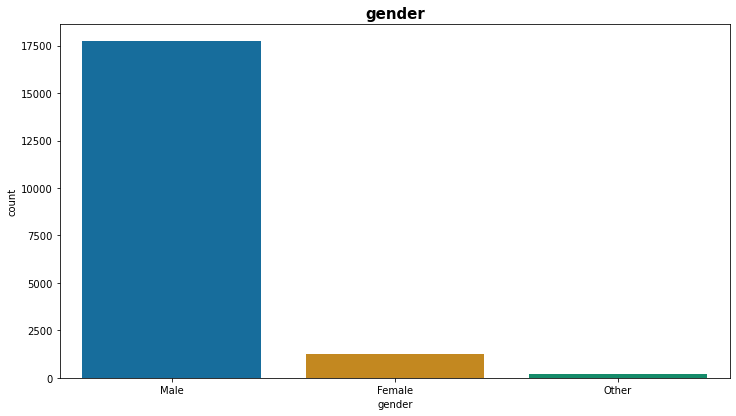

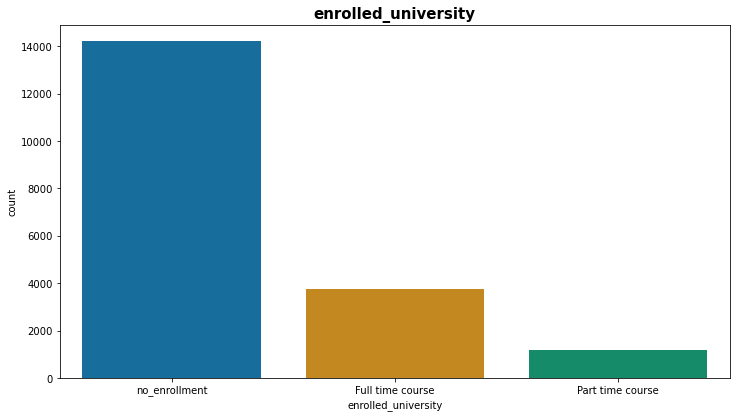

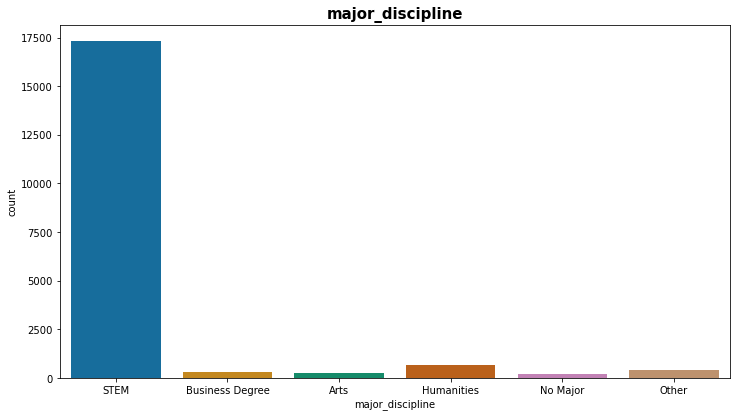

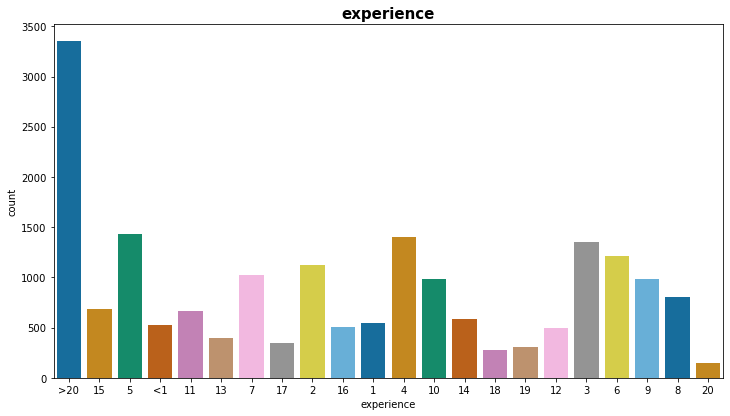

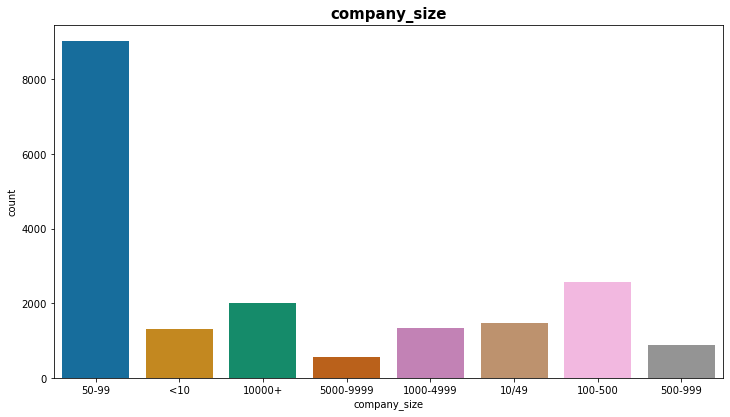

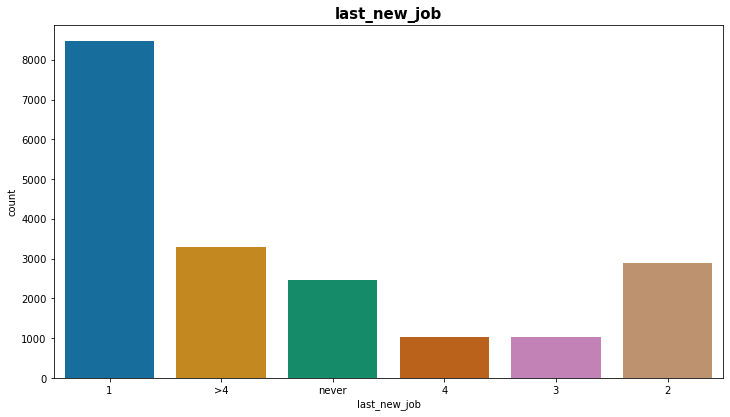

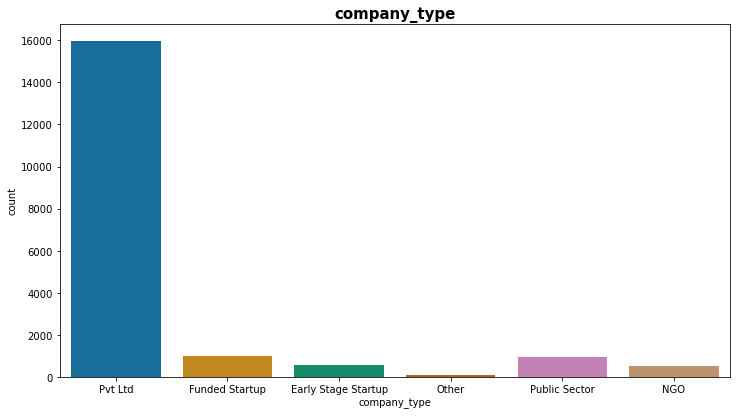

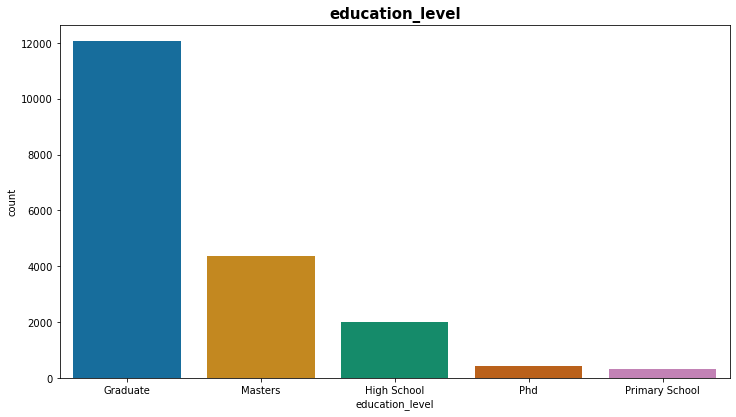

In [66]:
cols_with_nan_data = train_data[['gender', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'last_new_job', 'company_type', 'education_level']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_nan_data:
    plt.figure(figsize=(12,6.5)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    sns.countplot(data = train_data[i], x = cols_with_nan_data[i], palette=colorblind_palette)
    plt.show()

Text(0.5, 1.0, 'Impact of Education on Company Type')

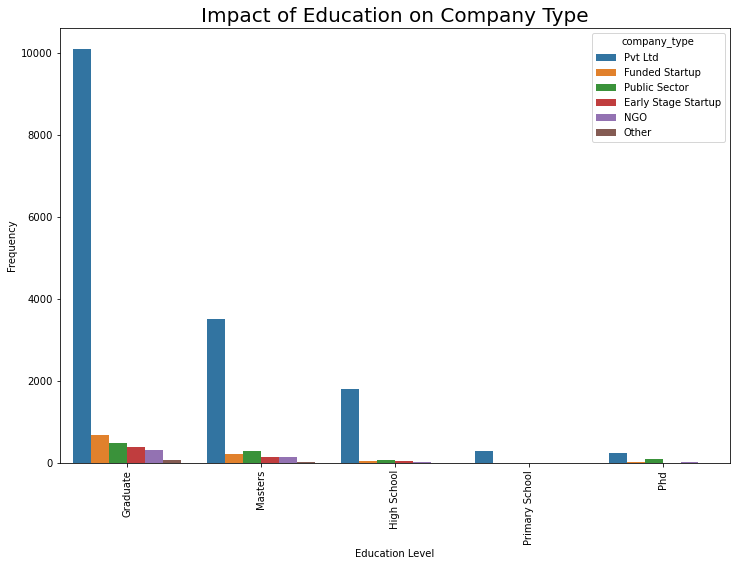

In [69]:
temp = train_data[['education_level', 'company_type']]
temp.dropna(axis=0, inplace = True)
value_counts = temp.value_counts().to_frame()
value_counts.reset_index(level=[0, 1], inplace=True)
value_counts = value_counts.rename(columns = {0:'count'})
bar, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = 'education_level', y = 'count', data = value_counts, hue='company_type')
plt.xticks(rotation = 90)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Impact of Education on Company Type', fontsize=20)


Text(0.5, 1.0, 'Impact of Gender on leaving company')

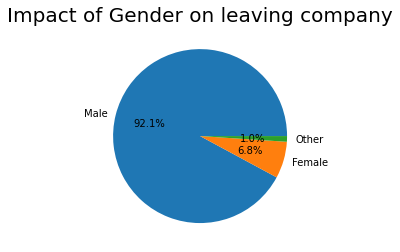

In [74]:
#Distribution over Gender
gender = train_data[train_data['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(4,4))
plt.pie(x = temp, labels = labels, autopct="%.1f%%")
plt.title('Impact of Gender on leaving company', fontsize=20)


In [76]:
#Training Hours Histogram
data['training_hours'].median(axis=0)

47.0

Text(0.5, 0, 'Training Hours')

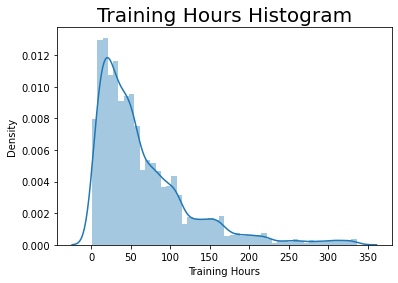

In [77]:
sns.distplot(a = data['training_hours'])
plt.title('Training Hours Histogram', fontsize=20)
plt.xlabel('Training Hours')

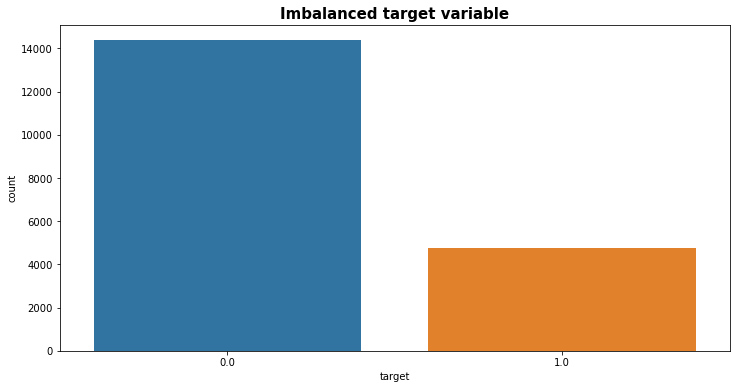

In [10]:
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x='target', data=train_data)


From the information we've learned about our dataset, we have to deal with the following challenges:

There are NaN values in some attributes that we need to replace properly (new category, replace with most frequent values, median, mean,...)
The target variable "target" is highly unbalanced, it needs to be balanced in order to be able to implement ML with fair results

In [11]:
data=train_data
data.shape

(19158, 14)

In [12]:
data['city'] = data['city'].str.split("_",expand=True)[1].astype('int64')
data['gender'] = data['gender'].replace(np.nan, 'Male')
data['enrolled_university'] = data['enrolled_university'].replace(np.nan, 'no_enrollment')
data['education_level'] = data['education_level'].replace(np.nan,'Graduate')
data['major_discipline'] = data['major_discipline'].replace(np.nan,'STEM')
data['experience'] = data['experience'].replace(np.nan,'>20')
data['company_size'] = data['company_size'].replace(np.nan,'50-99')
data['company_type'] = data['company_type'].replace(np.nan,'Pvt Ltd')
data['last_new_job'] = data['last_new_job'].replace(np.nan,'1')


In [13]:
data = data[data.gender != 'Other']


In [14]:
data.shape

(18967, 14)

We've successfully replaced all NaN values:



In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18967 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18967 non-null  int64  
 1   city                    18967 non-null  int64  
 2   city_development_index  18967 non-null  float64
 3   gender                  18967 non-null  object 
 4   relevent_experience     18967 non-null  object 
 5   enrolled_university     18967 non-null  object 
 6   education_level         18967 non-null  object 
 7   major_discipline        18967 non-null  object 
 8   experience              18967 non-null  object 
 9   company_size            18967 non-null  object 
 10  company_type            18967 non-null  object 
 11  last_new_job            18967 non-null  object 
 12  training_hours          18967 non-null  int64  
 13  target                  18967 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [16]:
pd.options.mode.chained_assignment = None
ordinal_atributes = ['education_level', 'experience', 'company_size', 'last_new_job']

cardinal_atributes = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[
                                    ['Unknown', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
                                    'Unknown,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
                                    ['Unknown','<10', '10/49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
                                    ['Unknown','1', '2', '3', '4', '>4', 'never']
                                ]))
])

ordinal_pipeline.fit(data[ordinal_atributes])
data[ordinal_atributes] = ordinal_pipeline.transform(data[ordinal_atributes])
data = pd.get_dummies(data, columns=cardinal_atributes)
data.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,8949,103,0.920,3.0,22.0,3.0,1.0,36,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,29725,40,0.776,3.0,16.0,3.0,5.0,47,0.0,0,...,0,0,0,1,0,0,0,0,0,1
2,11561,21,0.624,3.0,6.0,3.0,6.0,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
3,33241,115,0.789,3.0,1.0,3.0,6.0,52,1.0,0,...,0,0,0,0,0,0,0,0,0,1
4,666,162,0.767,4.0,22.0,3.0,4.0,8,0.0,0,...,0,0,0,1,0,1,0,0,0,0


# Modelling

In [19]:
X_ros,X_test,y_ros,y_test = train_test_split(X, y,test_size=0.3,stratify=y,random_state=42)
X_ros.shape,X_test.shape,y_ros.shape,y_test.shape


((13276, 27), (5691, 27), (13276,), (5691,))

In [20]:
knnc = KNeighborsClassifier(n_neighbors=4)
knnc.fit(X_ros, y_ros)
y_pred_knnc = knnc.predict(X_test)

print(classification_report(y_test, y_pred_knnc))
print('The accuracy score with using the KNN is :',accuracy_score(y_test,y_pred_knnc))
              

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84      4273
         1.0       0.40      0.12      0.18      1418

    accuracy                           0.74      5691
   macro avg       0.58      0.53      0.51      5691
weighted avg       0.67      0.74      0.68      5691

The accuracy score with using the KNN is : 0.7360745036021789


In [23]:
params = {'n_neighbors': np.arange(1, 31, 2), "metric": ["euclidean"]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
knn_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned KNN is: ', knn_accuracy)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
The accuracy score with using the tuned KNN is:  0.7522597253176956


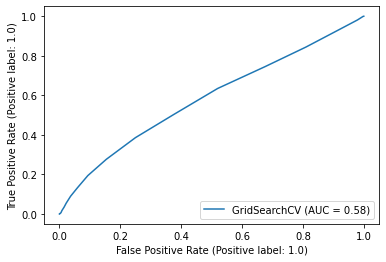

In [24]:
plot_roc_curve(grid_search_cv, X_test, y_test)


In [25]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state=0)

dtc.fit(X_ros, y_ros)
y_pred_dtc = dtc.predict(X_test)
#metrics.accuracy_score(y_test, y_pred_dtc)

print(classification_report(y_test, y_pred_dtc))
print('The accuracy score with using the decision tree classifier is :',accuracy_score(y_test,y_pred_dtc))
              

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4273
         1.0       0.59      0.44      0.50      1418

    accuracy                           0.78      5691
   macro avg       0.71      0.67      0.68      5691
weighted avg       0.77      0.78      0.77      5691

The accuracy score with using the decision tree classifier is : 0.7829906870497276


In [26]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)
# returns the best model
grid_search_cv.best_estimator_
# the best parameters
grid_search_cv.best_params_
# results obtained by the best model
dt_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned decision tree classifier is: ', dt_accuracy)

Fitting 3 folds for each of 294 candidates, totalling 882 fits
The accuracy score with using the tuned decision tree classifier is:  0.7823893054481181


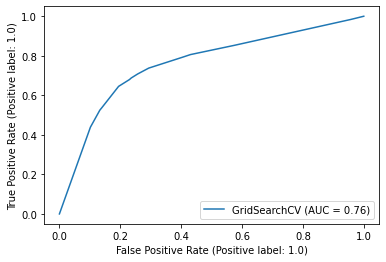

In [27]:
plot_roc_curve(grid_search_cv, X_test, y_test)

In [28]:
rfc = RandomForestClassifier(n_estimators = 50, class_weight = {0:1, 1:4})
rfc.fit(X_ros, y_ros)
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))
print('The accuracy score with using the Random Forest is :',accuracy_score(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85      4273
         1.0       0.55      0.34      0.42      1418

    accuracy                           0.77      5691
   macro avg       0.68      0.63      0.64      5691
weighted avg       0.74      0.77      0.75      5691

The accuracy score with using the Random Forest is : 0.767351959233878


In [29]:
params = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_ros, y_ros)

grid_search_cv.best_estimator_
grid_search_cv.best_params_
rf_accuracy = grid_search_cv.best_score_ 
print('The accuracy score with using the tuned Random Forest is :',rf_accuracy)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
The accuracy score with using the tuned Random Forest is : 0.7695089366634243


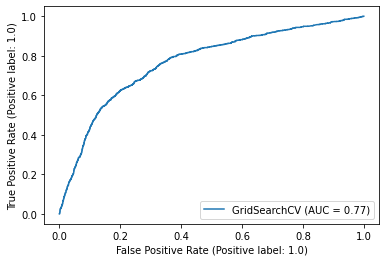

In [30]:
plot_roc_curve(grid_search_cv, X_test, y_test)


# FINE TUNING

In [32]:
accuracies = {"Decision Tree Accuracy":dt_accuracy,  "Random Forest Accuracy":rf_accuracy, "KNN Accuracy":knn_accuracy}
print("The best score has the model: ", max(accuracies, key=accuracies.get))


The best score has the model:  Decision Tree Accuracy


The decission tree model has clearly the highest accuracy. Let's now check how good were the other ones!



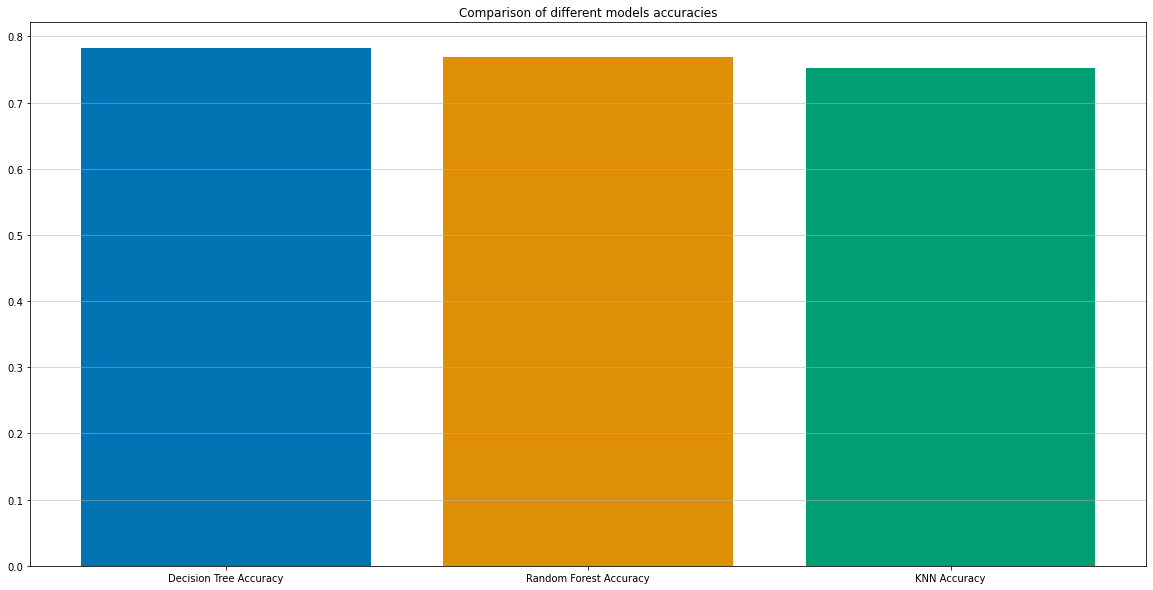

In [33]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*accuracies.items()), color=colorblind_palette, width = 0.8)
plt.title("Comparison of different models accuracies")
plt.grid(axis = 'y', linewidth = 0.5)
plt.show()